<center><font size = "10"> Week 8 - Synapses <center>
<center><font size = "8">Home work - Solutions<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 5
<br>Group member1: Nathan Girard
<br>Group member2: Camil Hamdane
<br>Group member3: Martim Simoes
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignements to be delivered by next Monday before 23:59.

In [30]:
import h5py
import numpy as np
import neuron
from neuron import h
import matplotlib.pyplot as plt

%matplotlib inline

--No graphics will be displayed.


In [2]:
data_c10 = h5py.File("Group5/connection_c10.h5", "r")
data_c64 = h5py.File("Group5/connection_c64.h5", "r")
data_c77 = h5py.File("Group5/connection_c77.h5", "r")
data = [data_c10, data_c64, data_c77];
data_names = ["c10", "c64","c77"]

!nrnivmodl

/home/In silico neuro/Week 8
Mod files: "./SimpleAMPA_NMDA.mod" "./TsodyksMarkram_AMPA_NMDA.mod" "./vecevent.mod"

COBJS=''
 -> Compiling mod_func.c
x86_64-linux-gnu-gcc -O2   -I.   -I/usr/local/lib/python3.8/dist-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
 => LINKING shared library ./libnrnmech.so
x86_64-linux-gnu-g++ -O2 -DVERSION_INFO='8.0.0' -std=c++11 -shared -fPIC  -I /usr/local/lib/python3.8/dist-packages/neuron/.data/include -o ./libnrnmech.so -Wl,-soname,libnrnmech.so \
  ./mod_func.o ./SimpleAMPA_NMDA.o ./TsodyksMarkram_AMPA_NMDA.o ./vecevent.o  -L/usr/local/lib/python3.8/dist-packages/neuron/.data/lib -lnrniv -Wl,-rpath,/usr/local/lib/python3.8/dist-packages/neuron/.data/lib   
rm -f ./.libs/libnrnmech.so ; mkdir -p ./.libs ; cp ./libnrnmech.so ./.libs/libnrnmech.so
Successfully created x86_64/special


## Optional: Plot the dependence of the NMDA conductance on the Mg2+ concentration.

<font sie='3'>Create a single compartmental soma neuron to host the synpase modeled in SimpleAMPA_NMDA.mod file. Using the stimulation pattern and the values for the synaptic conductances used in tutorial 01, plot the NMDA conductance at different mM [Mg2+] values. Select appropiate values to explore the dynamics. 
    
<font sie='3'> What happens to the NMDA conducatance in relation to Mg2+? What is the functional purpose of this behaviour?

# <font color= 'red'>Ex 1:</font>  Configure a facilitating synapse (E1)
    
<font size='3'> Create a single compartmental soma neuron, add to it passive properties, add to the center of the neuron a synapse with the mechanism modeled in TsodyksMarkram_AMPA_NMDA.mod file, inject a stimulation pattern and define the conductances for NMDA and AMPA receptors, as it was done in tutorial 02. 

<font size='3'>Find the values for `U1`, `tau_rec` and `tau_facil` that would make the synapse behave as a facilitating synapse and plot the `R`, `Use` and conductance curves. Write a definition of `U1`, `tau_rec` and `tau_facil`.
    
<font size='3'>Plot comparison (histograms) between the three parameters in three types on synapses (facilitating, depressing and pseudolinear from Tutorial 2) and briefly interpret them. Is there relationship between the parameters and variables depending on the synapse type?
    
 
    
<font size='3'><font color= 'red'>[1.5 pts]</font>

In [31]:
soma = neuron.h.Section()
soma.L = 40
soma.diam = 40
soma.insert("pas")

__nrnsec_0x4600ef0

In [32]:
# Configure the passive biophysics
for sec in h.allsec():
    sec.Ra = 100
    sec.cm = 1

In [33]:
synapse = h.TsodyksMarkram_AMPA_NMDA(soma(0.5))

In [34]:
stimulator = h.VecStim()
spike_times = [100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 950.0]
spikes_vector = h.Vector(spike_times)
stimulator.play(spikes_vector)

connection = h.NetCon(stimulator, synapse)
connection.weight[0] = 1.0  # In units of [nS] due to the gmax scaling factor in our .mod file

In [35]:
g_syn = h.Vector()
g_syn.record(synapse._ref_g)
i_syn = h.Vector()
i_syn.record(synapse._ref_i)
v_soma = h.Vector()
v_soma.record(soma(0.5)._ref_v)
time = h.Vector()
time.record(neuron.h._ref_t)
R_syn = h.Vector()
R_syn.record(synapse._ref_R)
Use_syn = h.Vector()
Use_syn.record(synapse._ref_Use)

Vector[6]

In [36]:
synapse.gmax_AMPA = 0.002  # uS
synapse.gmax_NMDA = (0.7 * 0.002)  # uS - 0.7 is a biologically typical ratio of NMDA to AMPA conductance
synapse.mg = 1.0  # mM

In [42]:
synapse.U1 = 0.03  # Baseline release probability
synapse.tau_rec = 130 # ms - recovery from depression
synapse.tau_facil = 530  # ms - relaxation from facilitation

neuron.h.run()

LookupError: 'tstop' is not a defined hoc variable name.

(0.0, 1000.0, -70.0, -69.5)

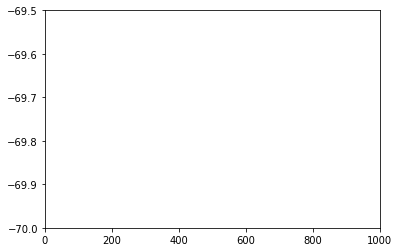

In [38]:
plt.figure()
plt.plot(time, v_soma)
plt.axis([0, 1000, -70, -69.5])

(0.0, 1000.0, -70.0, -69.5)

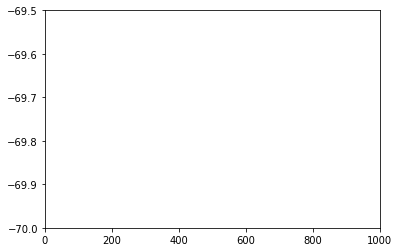

In [39]:
plt.figure()
plt.plot(time, v_soma)
plt.axis([0, 1000, -70, -69.5])

In [ ]:
plt.figure()
plt.plot(time, R_syn, label="$R$ - frac. of pool avail.")
plt.plot(time, Use_syn, label="$U_{SE}$ - running rel. prob.")
plt.legend()
plt.axis([0, 1000, 0, 1.5])

plt.figure()
plt.plot(time, g_syn, label="$g_{syn}$")
plt.legend()

# <font color= 'red'>Ex 2:</font>  Compute EPSP's Features: amplitudes, latencies, tau rise and Coefficient of Variation (CV) of the EPSP amplitudes 

<font size='3'>Compute the amplitudes, latencies and tau rise of the excitatory postsynaptic potential (EPSP) of the three connections traces provided for your group (.h5 files you can find in the group folder). Visualize the mean values and standard deviations of this features.


<font size='3'>Then compute the coefficient of variation of EPSP amplitudes for each of the connections and the mean CV profile between them. Visualize your results in two plots:
- mean CV profiles: the plot should have four curves, one per each connection and one for the mean
- raster plot of CV of EPSP amplitudes as a function of EPSP amplitudes (all EPSPS, not only the first one)

<font size='3'>Both plots should look similar to the ones in the paper show in the lecture [Barros-Zulaica et al., 2019](https://www.ncbi.nlm.nih.gov/pubmed/31680928). 
    
<font size='3'>*Hint: Be careful with which plot should have a standard deviations*

<font size='3'><font color= 'red'>[2.5 pts]</font>

In [3]:
from scipy.optimize import curve_fit
from statsmodels.tsa.stattools import acf
from scipy.stats import variation

def extract_PSP_window(trace, time, stimulation_index, time_before=50, time_after=300):
    """Extract a time window with a single EPSP trace"""
    psp_trace = trace[stimulation_index - time_before : stimulation_index + time_after]
    psp_time = time[stimulation_index - time_before : stimulation_index + time_after]

    return psp_trace, psp_time

def extract_EPSP_features(psp_trace, psp_time, stimulation_time):
    # find absolute values of the psp trace
    max_psp = np.max(psp_trace)
    min_psp = np.min(psp_trace)
    amplitude_psp = np.abs(max_psp - min_psp)

    # compute percentages of amplitudes
    twenty_amplitude = amplitude_psp * 80.0 / 100.0
    eighty_amplitude = amplitude_psp * 20.0 / 100.0
    five_amplitude = amplitude_psp * 95.0 / 100.0
    amplitude = eighty_amplitude - twenty_amplitude

    # compute amplitude percentages on the psp trace
    psp_percent = {
        "five": -(five_amplitude - max_psp),
        "twenty": -(twenty_amplitude - max_psp),
        "eighty": -(eighty_amplitude - max_psp),
    }

    # find corresponding index of an array
    five_index = np.where(psp_trace >= psp_percent["five"])[0][0]
    twenty_index = np.where(psp_trace >= psp_percent["twenty"])[0][0]
    eighty_index = np.where(psp_trace >= psp_percent["eighty"])[0][0]

    # extract time points for percentage points of the trace
    psp_times = {
        "five": psp_time[five_index],
        "twenty": psp_time[twenty_index],
        "eighty": psp_time[eighty_index],
    }

    # calculate time features of a PSP
    tau_rise = np.abs((psp_times["twenty"] - psp_times["eighty"]))
    latency = np.abs((psp_times["five"]) - stimulation_time)

    return psp_percent, psp_times, amplitude, tau_rise, latency

def extract_amplitude(psp_trace):
    """Extract amplitude from a single EPSP trace and convert to mV"""
    max_psp = np.max(psp_trace)
    min_psp = np.min(psp_trace)

    return np.abs(max_psp - min_psp) * 1000

def expCurveFit(x, y):
    popt, pcov = curve_fit(func_exp, x, y)
    perr = np.sqrt(np.diag(pcov))
    return popt, perr
    

In [4]:
traces = [];
mean_traces = [];
taus = []
sigmas = []

time = np.arange(0, 1.3, 0.0001)
stimulation_indices = np.array([1000, 1500, 2000, 
                    2500, 3000, 3500, 4000, 4500, 10000])

all_features = []

for d in data:
    
    curr_features = []
    
    for key in d.keys():
        
        for i in range(len(stimulation_indices)):
        
            trace = np.array((d.get(key)))

            psp_trace, psp_time = extract_PSP_window(trace, time, stimulation_indices[i])

            _, _, amplitude, tau_rise, latency = extract_EPSP_features(
                                            psp_trace, psp_time, stimulation_indices[i])

            curr_features.append(np.array([amplitude, tau_rise, latency]))
        
    all_features.append(curr_features)
        
arr = np.array([np.array(feat) for feat in all_features])
print(arr[0].shape)
mean_feats = [arr[i].mean(axis = 0) for i in range(len(arr))]
deviations = [arr[i].std(axis = 0) for i in range(len(arr))]

for i in range(len(data)):
    
    print("Connection ", data_names[i], " amplitude: mean = ", mean_feats[i][0]*1000, "mV std = ", deviations[i][0]*1000,"mV")
    print("Tau rise: mean =", mean_feats[i][1], "ms, std = ", deviations[i][1],"ms\n Latency: mean = ", 
          mean_feats[i][2],"ms, std = ", deviations[i][2],"ms\n")
    

(180, 3)
Connection  c10  amplitude: mean =  -0.39912501970926917 mV std =  0.2860720508640384 mV
Tau rise: mean = 0.005862222222222219 ms, std =  0.006558219232853754 ms
 Latency: mean =  3555.2044833333352 ms, std =  2521.2603216619955 ms

Connection  c64  amplitude: mean =  -0.7130693147579831 mV std =  0.35623738907554886 mV
Tau rise: mean = 0.007091481481481483 ms, std =  0.004306880974805141 ms
 Latency: mean =  3555.2048666666697 ms, std =  2521.26023720293 ms

Connection  c77  amplitude: mean =  -0.60039545688252 mV std =  0.3731100772877531 mV
Tau rise: mean = 0.006816760828625233 ms, std =  0.0056378230409865485 ms
 Latency: mean =  3555.2048184557357 ms, std =  2521.260304800048 ms



/tmp/ipykernel_42/4293184430.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array([np.array(feat) for feat in all_features])


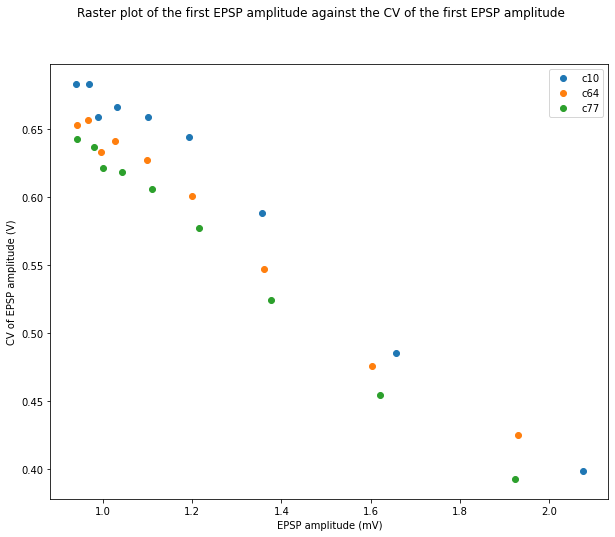

In [22]:
all_amps = [[] for i in range(len(data))]
all_CVs = [[] for i in range(len(data))]


for i in range(len(data)):

    amps = []
    CVs = []
    
    for j in range(len(stimulation_indices)):
        
        for key in data[i].keys():

            trace = np.array((d.get(key)))

            psp_trace, _ = extract_PSP_window(trace, time, stimulation_indices[j])
            
            amplitude = extract_amplitude(psp_trace)
            
            amps.append(amplitude)
        
        mean_amp = np.mean(amps)
        CV = variation(amps)
        
        all_amps[i].append(mean_amp)
        all_CVs[i].append(CV)
            
fig, ax = plt.subplots(figsize=(10, 8))

for i, amps, CVs in zip(range(len(all_amps)), all_amps, all_CVs):
    plt.scatter(amps, CVs, label = data_names[i])
    
plt.xlabel("EPSP amplitude (mV)")
plt.ylabel("CV of EPSP amplitude (V)")
plt.legend()
plt.suptitle("Raster plot of the first EPSP amplitude against the CV of the first EPSP amplitude")
plt.show()

In [27]:
# Global array
values = ([[] for i in range(len(stimulation_indices))])
values_per_connection = []

for d in data:
    
    # 1 array per connection:
    curr_values = ([[] for i in range(len(stimulation_indices))])
    
    for i in range(len(stimulation_indices)):    
        for key in d.keys():
            
            trace = np.array((d.get(key)))
            psp_trace, _ = extract_PSP_window(trace, time, stimulation_indices[i])
            amplitude = extract_amplitude(psp_trace)
            CV = variation(psp_trace)
            values[i].append(CV)
            curr_values[i].append(CV)
            
    values_per_connection.append(curr_values)

# values_per_connection.append(np.mean(values, axis = 1))
print(len(values_per_connection[2][2]))

59


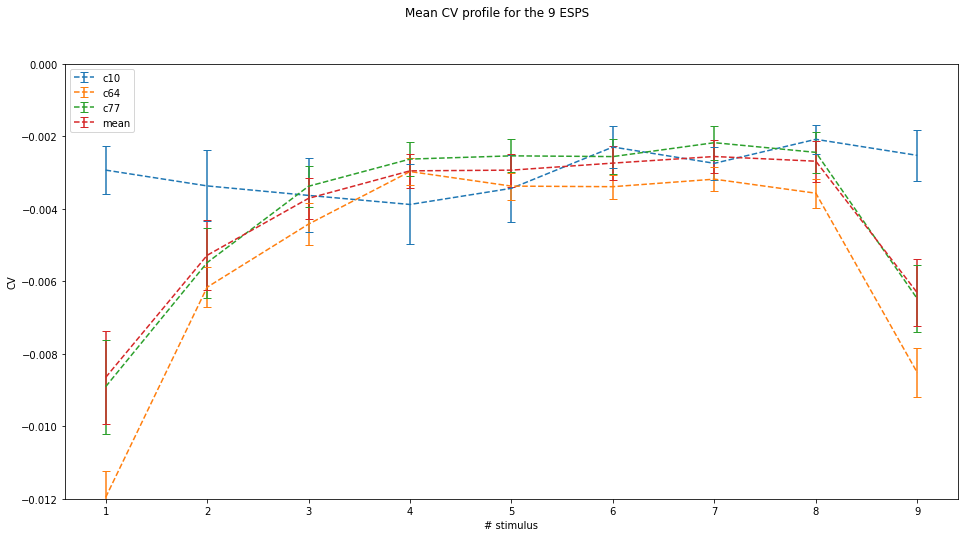

In [28]:
means = np.mean(values, axis = 1) 
stds = np.std(values, axis = 1) / np.sqrt(len(values))
x = np.arange(len(means))+1

fig, ax = plt.subplots(figsize=(16,8))
plt.ylim((-0.012, 0))

for i in range(len(data)):
    
    vals = values_per_connection[i]
    stds = np.std(vals, axis = 1) / np.sqrt(len(vals))
    curr_means = np.mean(vals, axis = 1)
    
    ax.errorbar(x=x, #x-coordinates of bars
           y=curr_means, #height of bars
           yerr=stds, #error bar width
           capsize=4,
           ls = '--',
           label = data_names[i]) #length of error bar caps
#plt.plot(means)
ax.errorbar(x=x, #x-coordinates of bars
           y=means, #height of bars
           yerr=stds, #error bar width
           capsize=4,
           ls = '--',
           label = 'mean') #length of error bar caps
plt.xlabel('# stimulus')
plt.ylabel('CV')
plt.legend()
plt.suptitle('Mean CV profile for the 9 ESPS')
plt.show()

# <font color='red'>Ex 3:</font> Compute failure rate

<font size='3'>Compute the failure rate of the EPSPs from the connections of your group folder. The failure rate is the fraction of trials from which no PSP is generated above certain threshold. You can find a way of computing the failure rate in [Feldmeyer et al., 1999](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2269646/). Make sure to test for failure based both latency and amplitude size. Necessary noise can be extracted from the initial part of the simulation, before any stimulus arrives. 

    
<font size='3'>Represent the mean result of the three connections in a bar plot. For each connection visualize the distributions of the EPSPs amplitudes with split between the success and failure cases.  

<font size='3'><font color= 'red'>[2 pts]</font>

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data_c10 = h5py.File("Group5/connection_c10.h5", "r")
data_c64 = h5py.File("Group5/connection_c64.h5", "r")
data_c77 = h5py.File("Group5/connection_c77.h5", "r")
data = [data_c10, data_c64, data_c77];
data_names = ["c10", "c64","c77"]

In [4]:
traces = [];
mean_traces = [];
for d in data:
    trace_d = [];
    for key in d.keys():
        trace_d.append(d.get(key));
        
    mean_trace_d = np.mean(trace_d,axis=0)
    
    traces.append(trace_d)
    mean_traces.append(mean_trace_d)
time = np.arange(0, 1.3, 0.0001)

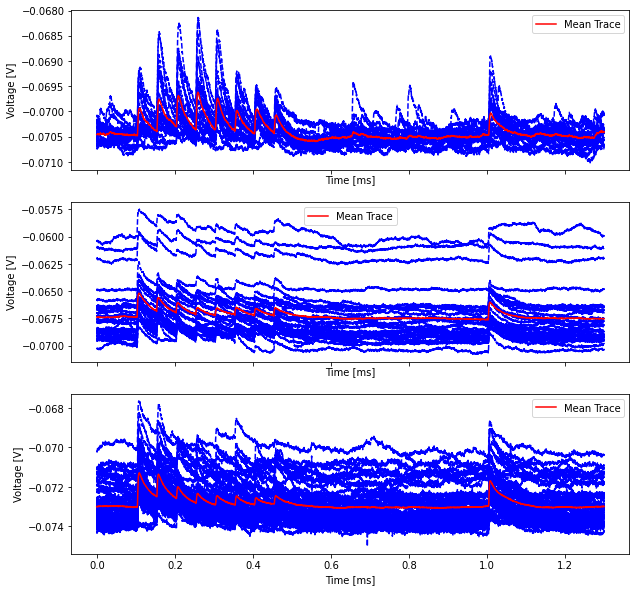

In [4]:
fig, ax = plt.subplots(len(data), 1, figsize=(10, 10), sharex=True)
for d in range(len(data)):
    for trace in traces[d]:
        ax[d].plot(time,trace,"b--")
    ax[d].plot(time,mean_traces[d],"r",label = "Mean Trace")
    ax[d].legend()
    ax[d].set_ylabel("Voltage [V]")
    ax[d].set_xlabel("Time [ms]");

In [5]:
def extract_PSP_window(trace, time, stimulation_index, time_before=50, time_after=300):
    """Extract a time window with a single EPSP trace"""
    psp_trace = trace[stimulation_index - time_before : stimulation_index + time_after]
    psp_time = time[stimulation_index - time_before : stimulation_index + time_after]

    return psp_trace, psp_time
def extract_baseline_noise(trace,first_stimulation_index = 1000):
    init_trace = trace[0:first_stimulation_index]
    baseline_noise = np.std(init_trace)
    return baseline_noise

In [6]:
def extract_EPSP_features(psp_trace, psp_time, stimulation_time):
    """
    Function takes in a EPSP curve and calculates the following features: amplitude;
    5%, 20% and 80% of the amplitude, tau rise and latency. Based on defintions from
    Feldmeyer et al., 1999.

    Parameters
    ----------
    psp_trace : array with voltage trace [mV]
    psp_time : array of psp times [s]
    stimulation_time : time of the stimulation [s]

    Returns
    -------
    psp_percent : dictionary with psp amplitudes at 5%, 20% and 80% of the amplitude
    times : dictionary with psp times at 5%, 20% and 80% of the amplitude
    amplitude : amplitude of the first EPSP computed as the difference between the 20 and the 80 % of rise
    tau_rise : distance between the time of 20% and 80% of the rise of the EPSP [s]
    latency : time between the AP of the presynaptic cell and 5% amplitude rise of the EPSP [s]
    """

    # find absolute values of the psp trace
    max_psp = np.max(psp_trace)
    min_psp = np.min(psp_trace)
    amplitude_psp = np.abs(max_psp - min_psp)

    # compute percentages of amplitudes
    twenty_amplitude = amplitude_psp * 80.0 / 100.0
    eighty_amplitude = amplitude_psp * 20.0 / 100.0
    five_amplitude = amplitude_psp * 95.0 / 100.0
    amplitude = twenty_amplitude - eighty_amplitude

    # compute amplitude percentages on the psp trace
    psp_percent = {
        "five": -(five_amplitude - max_psp),
        "twenty": -(twenty_amplitude - max_psp),
        "eighty": -(eighty_amplitude - max_psp),
    }

    # find corresponding index of an array
    five_index = np.where(psp_trace >= psp_percent["five"])[0][0]
    twenty_index = np.where(psp_trace >= psp_percent["twenty"])[0][0]
    eighty_index = np.where(psp_trace >= psp_percent["eighty"])[0][0]

    # extract time points for percentage points of the trace
    psp_times = {
        "five": psp_time[five_index],
        "twenty": psp_time[twenty_index],
        "eighty": psp_time[eighty_index],
    }

    # calculate time features of a PSP
    tau_rise = np.abs((psp_times["twenty"] - psp_times["eighty"]))
    latency = np.abs((psp_times["five"]) - stimulation_time)

    return psp_percent, psp_times, amplitude, tau_rise, latency;

In [7]:
#Failures were defined as events with amplitudes less than 1·5 × noise and/or latencies larger than 2·5 × the mean latency.
def failure(amplitude, latency, baseline_noise, mean_latency):
    return (amplitude < 1.5*baseline_noise or latency > 2.5*mean_latency)

In [8]:
stimulation_indices = np.array([1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 10000])

In [9]:
#Computing amplitudes and latencies:
amplitudes = [];
latencies  = [];
for d in range(len(data)):
    amplitudes_d = [];
    latencies_d  = [];
    for stimulation_index in stimulation_indices:
        amplitudes_stim = [];
        latencies_stim  = [];
        for trace in traces[d]:
            psp_trace, psp_time = extract_PSP_window(trace,time,stimulation_index)
            _ , _ , amplitude, _ , latency = extract_EPSP_features(psp_trace, psp_time, time[stimulation_index])
            amplitudes_stim.append(amplitude)
            latencies_stim.append(latency)
            
        amplitudes_d.append(amplitudes_stim)
        latencies_d.append(latencies_stim)
    
    amplitudes.append(amplitudes_d)
    latencies.append(latencies_d)   

In [10]:
print(len(latencies[0]))

9


In [11]:
#Computing Baseline Noises and Mean Latencies
baseline_noises = []
mean_latencies  = [] # means accross trials for a givn stimulus at a given connection
for d in range(len(data)):
    baseline_noises_d = []
    for trace in traces[d]:
        bn = extract_baseline_noise(trace,stimulation_indices[0])
        baseline_noises_d.append(bn)
    baseline_noises.append(baseline_noises_d)
    
for d in range(len(data)):
    mean_latencies_d  = []
    for s in range(len(stimulation_indices)):
        ml = np.mean(latencies[d][s])
        mean_latencies_d.append(ml)
    
    mean_latencies.append(mean_latencies_d)

In [12]:
print(len(mean_latencies[0]))
print(len(baseline_noises[0]))

9
20


In [13]:
#Decide Failures

Failures = [];
amplitudes_over_baseline_noise = []
for d in range(len(amplitudes)):
    f_d = [];
    a_d = [];
    for s in range(len(amplitudes[d])):
        f_ds = [];
        for t in range(len(amplitudes[d][s])):
            f_dst = failure(amplitudes[d][s][t],latencies[d][s][t],baseline_noises[d][t],mean_latencies[d][s])
            a_dst = amplitudes[d][s][t]/baseline_noises[d][t];
            
            f_ds.append(f_dst)
            a_d.append(a_dst)
            
        f_d.append(f_ds)
        
    Failures.append(f_d)
    amplitudes_over_baseline_noise.append(a_d)

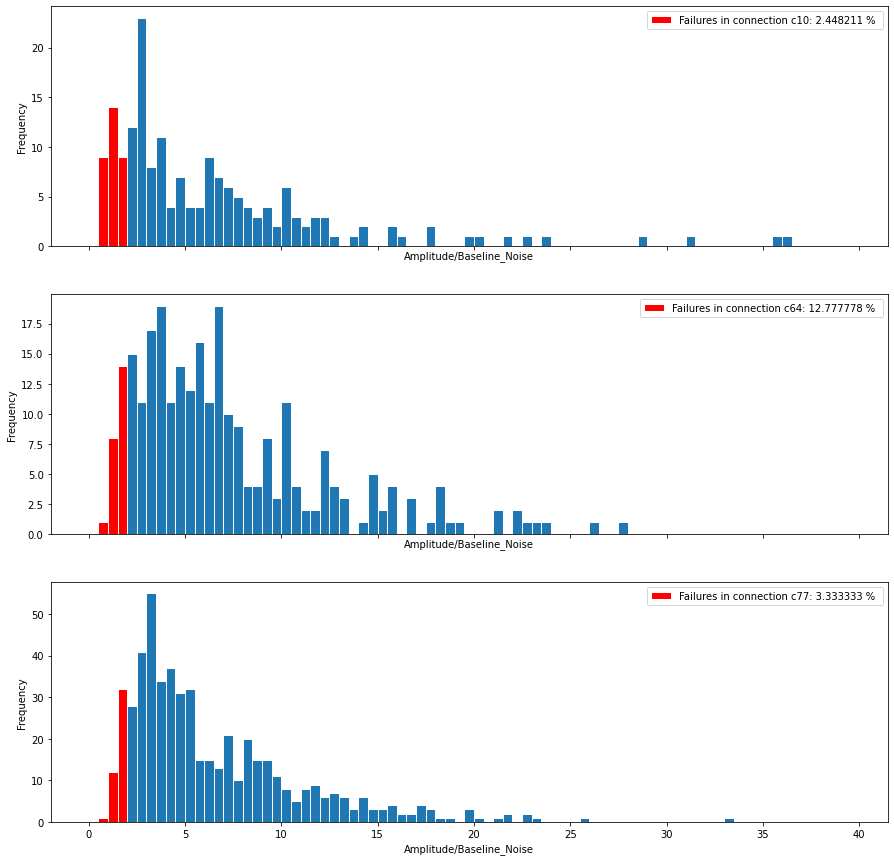

In [58]:
fig, ax = plt.subplots(len(data), 1, figsize=(15,15), sharex=True)
for d in range(len(data)):
    my_bins = np.arange(0, 40, 0.5)
    N, bins, patches = ax[d].hist(amplitudes_over_baseline_noise[d],bins = my_bins,edgecolor = 'w',label = "Failures in connection %s: %f %% "%(data_names[d],sum(N[0:3])*100/sum(N)))
    i = 0
    while (my_bins[i] <= 1.5):
        patches[i].set_facecolor('r')
        i = i+1
    ax[d].legend()
    ax[d].set_ylabel("Frequency")
    ax[d].set_xlabel("Amplitude/Baseline_Noise");
plt.show()

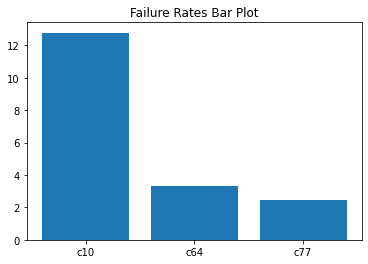

In [60]:
Failure_Rates = [0. , 0., 0.];
for d in range(len(Failures)):
    N_stim = len(Failures[d]);
    for s in range(N_stim):
        N_trace = len(Failures[d][s])
        for t in range(N_trace):
            if Failures[d][s][t]:                
                Failure_Rates[d] = Failure_Rates[d] + 100/(N_stim*N_trace)

plt.bar(data_names,height=Failure_Rates)
plt.title("Failure Rates Bar Plot")
plt.show()